# Near-Photon-Shells Demo Using Coordinate Time

First, we import the necessary modules.

In [1]:
%load_ext autoreload
%autoreload 2

from jax.config import config
config.update("jax_enable_x64", True)

from fadge import GRRT
from jax   import numpy as np

from matplotlib import pyplot as plt
from itertools  import product

We then instasize `PRay` into an object

In [2]:
grrt = GRRT(
    aspin=0.9325,
    eps=-1e-3, atol=1e-12, rtol=0, hmin=0,
    names={'ind':'lambda'},
    dtype=np.float64,
)

Radius of outer event horizon: 1.3611699738350351


To setup the initial conditions, we first create grids in `dPHI`, `dQ`, and `r`.

In [3]:
dP = np.linspace(-1e-4, 1e-4, 11) # related to phidot
dQ = np.linspace(-1e-4, 1e-4, 11) # thetadot^2

dPm, dQm = np.meshgrid(dP, dQ)
r        = np.repeat(3.5, dQm.size).reshape(dQm.shape)

grrt.set_shell(r, dPm, dQm)

To performm geodesic integration, simply call `pray.geode()`.
The return values are the full steps during the integration.

In [4]:
l, f = grrt.geode(L=200,N=20000,h=1) # full step output

ft = f[:,0,0]
fx = f[:,0,1]
fy = f[:,0,2]
fz = f[:,0,3]

def rKS(x, y, z):
    aa = grrt.aspin * grrt.aspin
    zz = z * z
    kk = 0.5 * (x * x + y * y + zz - aa)
    rr = np.sqrt(kk * kk + aa * zz) + kk
    return np.sqrt(rr)

fr = rKS(fx, fy, fz)

jit(masked_do); input: Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float64[2,4,11,11])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=0/1)> [Traced<ShapedArray(float64[2,4,11,11])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4,11,11])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4,11,11])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4,11,11])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4,11,11])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4,11,11])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4,11,11])>with<DynamicJaxprTrace(level=0/1)>]


100%|█████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 16.73it/s, lambda=200., dlambda=0.836    ]


We are finally ready to plot the results.

Text(0, 0.5, 'y')

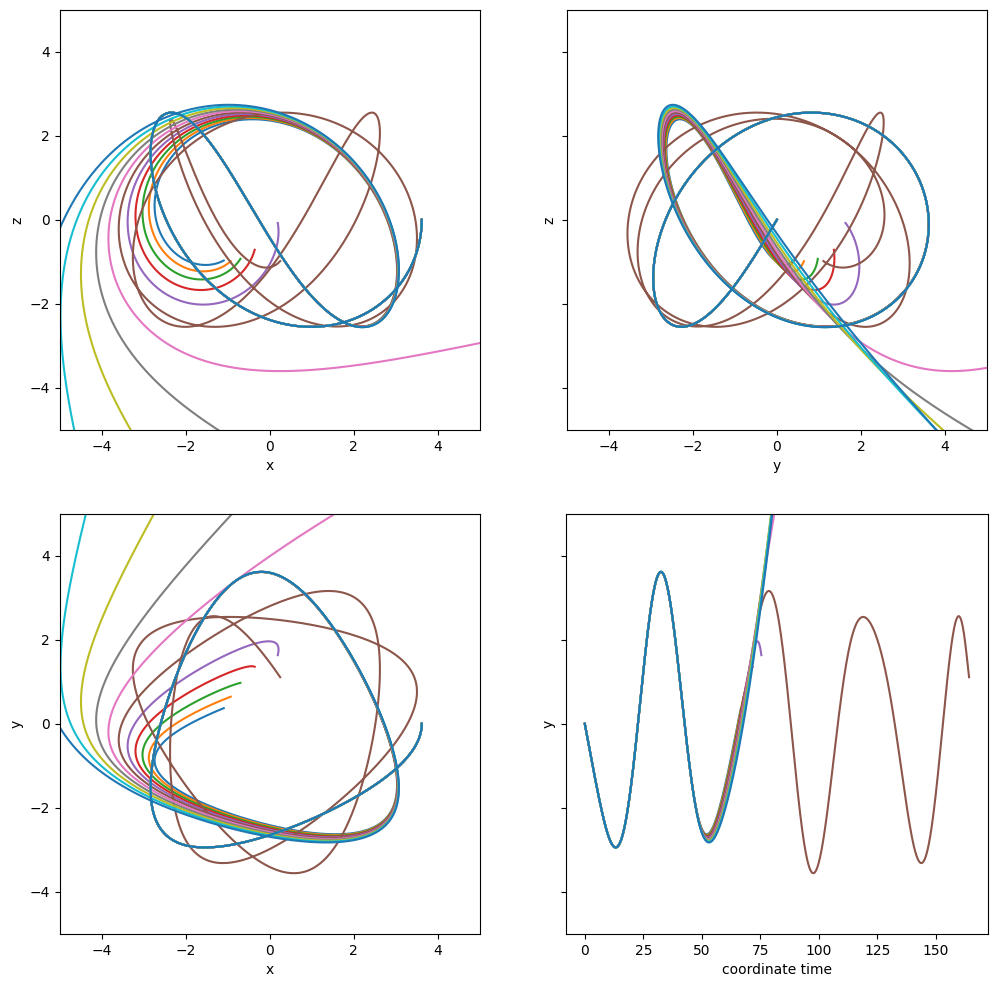

In [5]:
fig, axes = plt.subplots(2,2, figsize=(12,12), sharey=True)

lim = 5

iQ = 5
for iP in range(11):
    axes[0][0].plot(fx[:,iQ,iP], fz[:,iQ,iP])
    axes[0][1].plot(fy[:,iQ,iP], fz[:,iQ,iP])
    axes[1][0].plot(fx[:,iQ,iP], fy[:,iQ,iP])
    axes[1][1].plot(ft[:,iQ,iP], fy[:,iQ,iP])

ax = axes[0][0]
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_aspect('equal')

ax = axes[0][1]
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_aspect('equal')

ax = axes[1][0]
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_aspect('equal')

ax = axes[1][1]
ax.set_xlabel('coordinate time')
ax.set_ylabel('y')

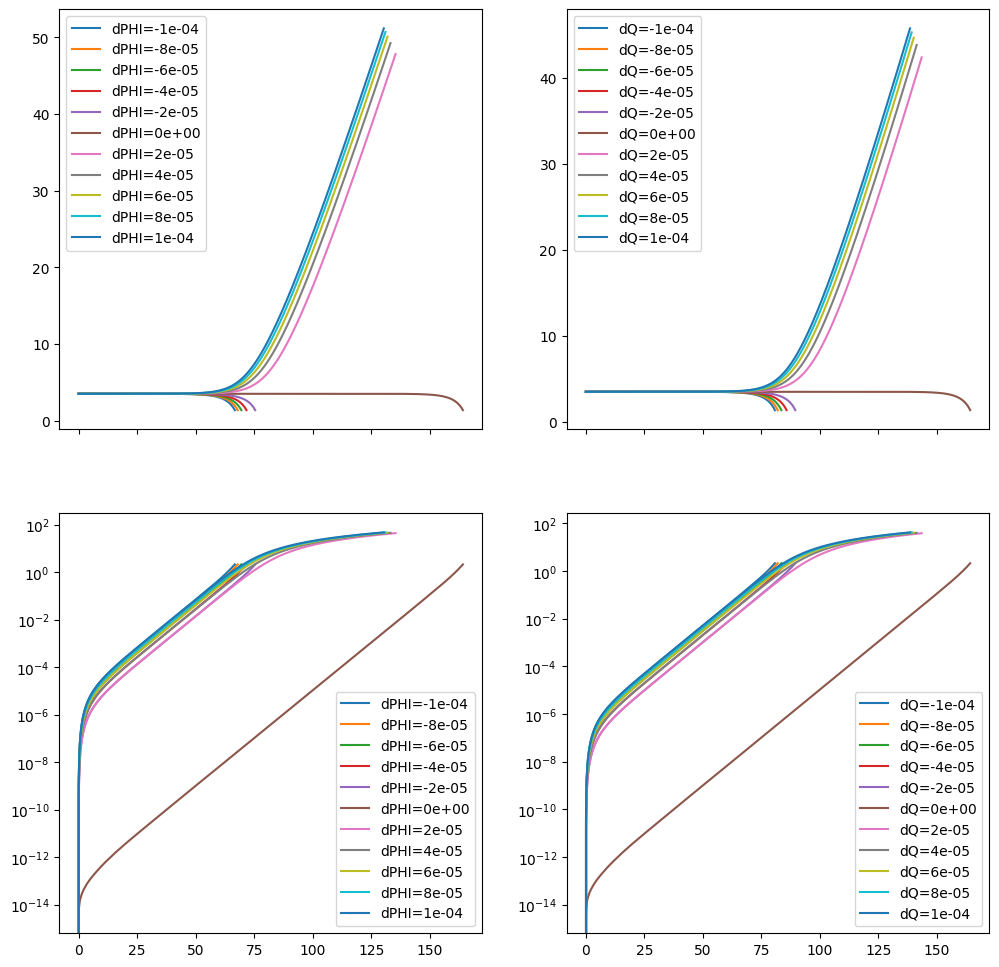

In [6]:
fig, axes = plt.subplots(2,2, figsize=(12,12), sharex=True)

iQ = 5
for iP in range(11):
    axes[0][0].plot(ft[:,iQ,iP], fr[:,iQ,iP], label=f'dPHI={dP[iP]:.0e}')
axes[0][0].legend()
for iP in range(11):
    axes[1][0].semilogy(ft[:,iQ,iP], abs(fr[:,iQ,iP] - fr[0,iQ,iP]), label=f'dPHI={dP[iP]:.0e}')
axes[1][0].legend()

iP = 5
for iQ in range(11):
    axes[0][1].plot(ft[:,iQ,iP], fr[:,iQ,iP], label=f'dQ={dQ[iQ]:.0e}')
axes[0][1].legend()
for iQ in range(11):
    axes[1][1].semilogy(ft[:,iQ,iP], abs(fr[:,iQ,iP] - fr[0,iQ,iP]), label=f'dQ={dQ[iQ]:.0e}')
axes[1][1].legend()